In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [53]:
df = pd.read_csv("../data/processed/netflix_cleaned.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,tv show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,tv show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...
3,s4,tv show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo..."
4,s5,tv show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...


In [54]:
df.shape
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      8807 non-null   str  
 4   cast          8807 non-null   str  
 5   country       8807 non-null   str  
 6   date_added    8807 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8807 non-null   str  
 9   duration      8807 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [55]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [56]:
df['date_added'].isnull().sum()

np.int64(98)

In [57]:
df = df.dropna(subset=['date_added'])

In [58]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()

In [59]:
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [60]:
df[['duration', 'duration_int']].head()

,duration,duration_int
0,90 min,90.0
1,2 Seasons,2.0
2,1 Season,1.0
3,1 Season,1.0
4,2 Seasons,2.0


In [61]:
df['length_category'] = pd.cut(
    df['duration_int'],
    bins=[0, 60, 120, 300],
    labels=['Short', 'Medium', 'Long']
)

In [62]:
df['length_category'] = pd.cut(
    df['duration_int'],
    bins=[0, 60, 120, 300],
    labels=['Short', 'Medium', 'Long']
)

In [63]:
current_year = 2024
df['content_age'] = current_year - df['release_year']

In [64]:
df['listed_in'] = df['listed_in'].str.split(', ')
df['genre_count'] = df['listed_in'].apply(len)

In [65]:
df['decade'] = (df['release_year'] // 10) * 10

In [66]:
df['country'] = df['country'].str.split(', ')
df['country_count'] = df['country'].apply(len)

In [67]:
# Recency Category (Unique Feature)
df['recency_category'] = pd.cut(
    df['content_age'],
    bins=[0,5,15,50,100],
    labels=['Very Recent','Recent','Old','Classic']
)

In [68]:
df['is_original'] = df['description'].str.contains("Netflix", case=False)

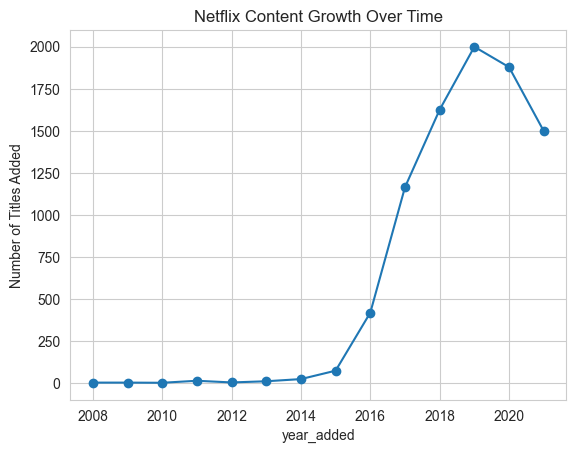

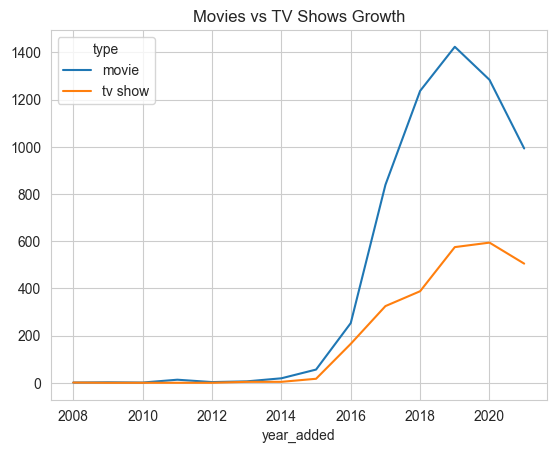

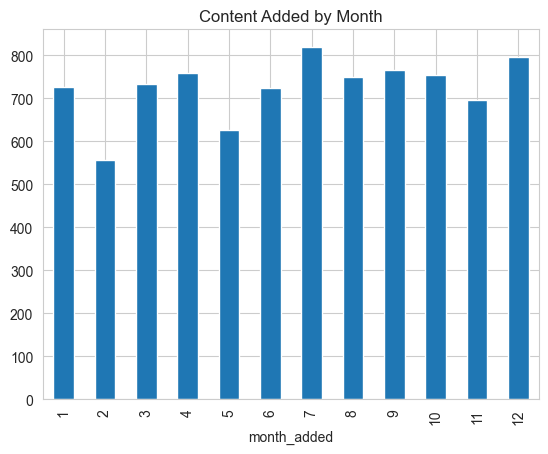

In [69]:
# Yearly Content Growth
df.groupby('year_added').size().plot(kind='line', marker='o')
plt.title("Netflix Content Growth Over Time")
plt.ylabel("Number of Titles Added")
plt.show()

# Movies vs TV Growth
pd.crosstab(df['year_added'], df['type']).plot()
plt.title("Movies vs TV Shows Growth")
plt.show()

# Month Trend
df['month_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Content Added by Month")
plt.show()

In [70]:
df.head()
df.info()

<class 'pandas.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8709 non-null   str           
 1   type              8709 non-null   str           
 2   title             8709 non-null   str           
 3   director          8709 non-null   str           
 4   cast              8709 non-null   str           
 5   country           8709 non-null   object        
 6   date_added        8709 non-null   datetime64[us]
 7   release_year      8709 non-null   int64         
 8   rating            8709 non-null   str           
 9   duration          8709 non-null   str           
 10  listed_in         8709 non-null   object        
 11  description       8709 non-null   str           
 12  year_added        8709 non-null   int32         
 13  month_added       8709 non-null   int32         
 14  month_name        8709 non-null   str   

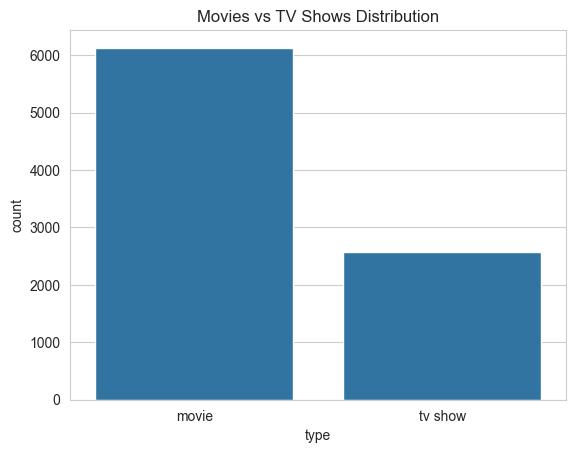

In [71]:
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows Distribution")
plt.show()

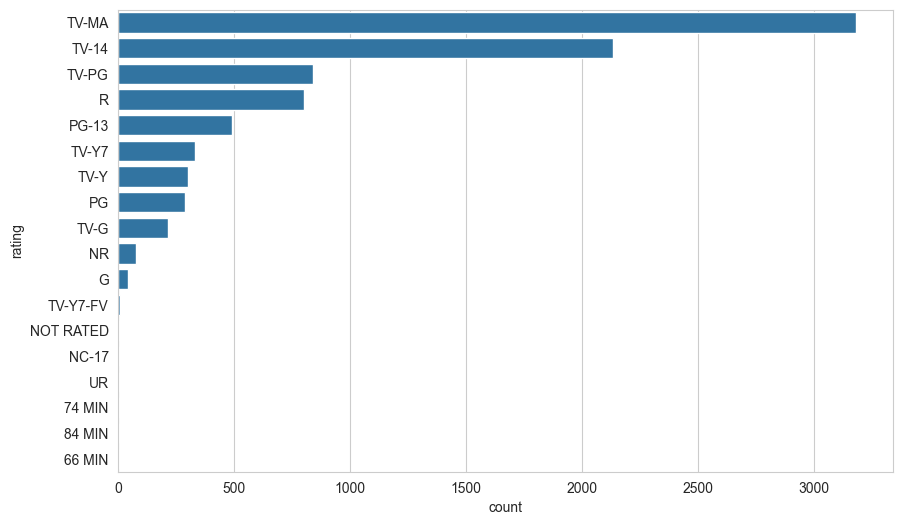

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(y='rating', data=df,
              order=df['rating'].value_counts().index)
plt.show()

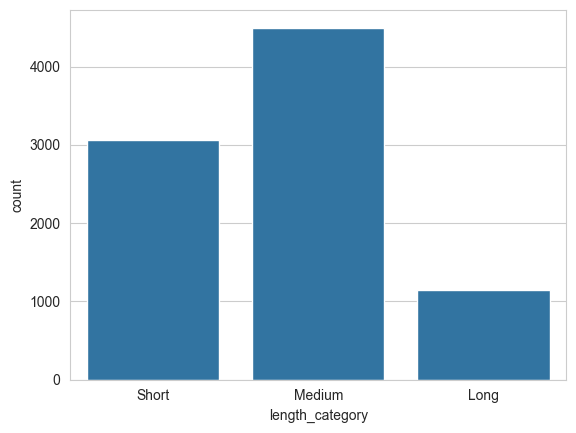

In [73]:
sns.countplot(x='length_category', data=df)
plt.show()

In [74]:
df_genre = df.explode('listed_in')
df_genre['listed_in'].value_counts().head(10)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International Tv Shows      1328
Documentaries                869
Action & Adventure           859
Independent Movies           756
Tv Dramas                    739
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

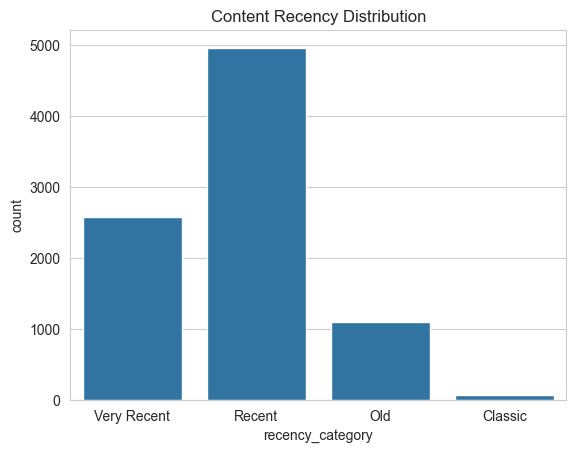

In [75]:
# Recency Category Distribution
sns.countplot(x='recency_category', data=df)
plt.title("Content Recency Distribution")
plt.show()

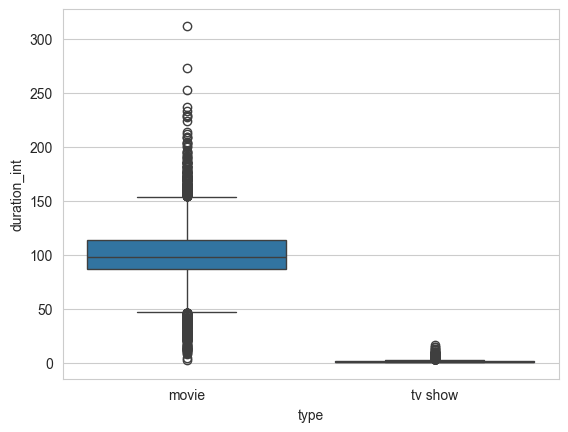

In [76]:
sns.boxplot(x='type', y='duration_int', data=df)
plt.show()

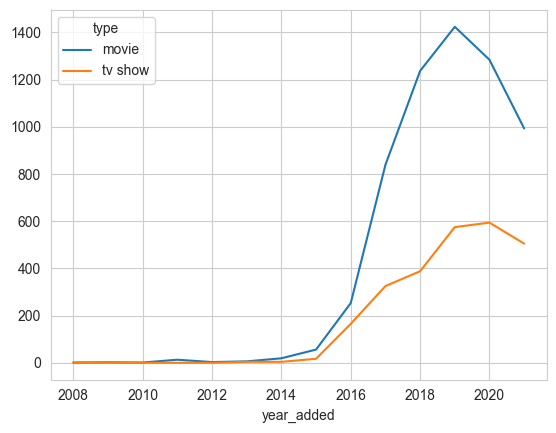

In [77]:
pd.crosstab(df['year_added'], df['type']).plot()
plt.show()

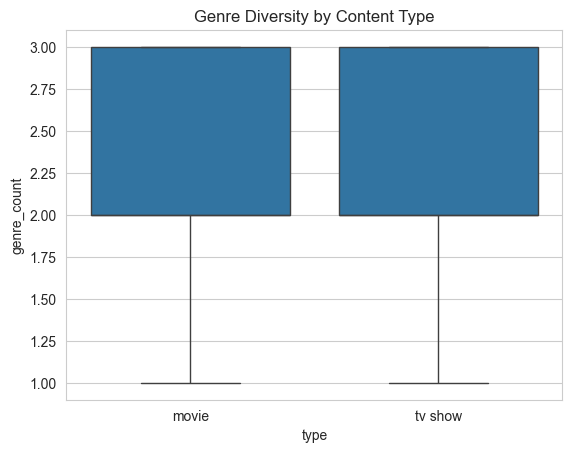

In [78]:
# Genre Count vs Type
sns.boxplot(x='type', y='genre_count', data=df)
plt.title("Genre Diversity by Content Type")
plt.show()

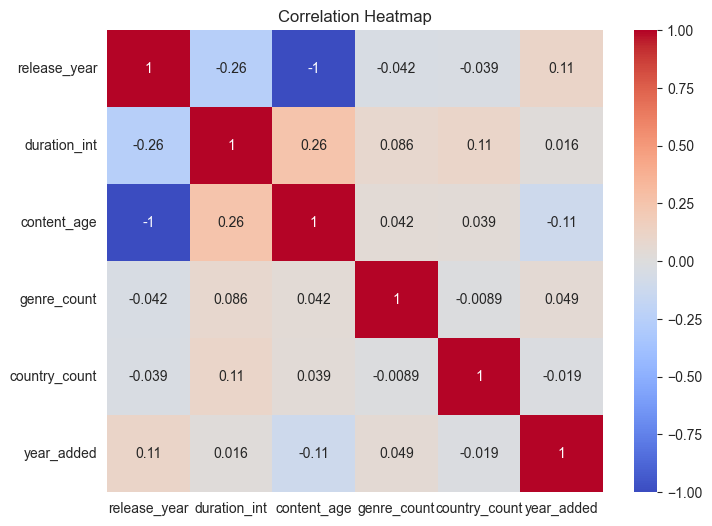

In [79]:
numeric_cols = df[['release_year',
                   'duration_int',
                   'content_age',
                   'genre_count',
                   'country_count',
                   'year_added']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

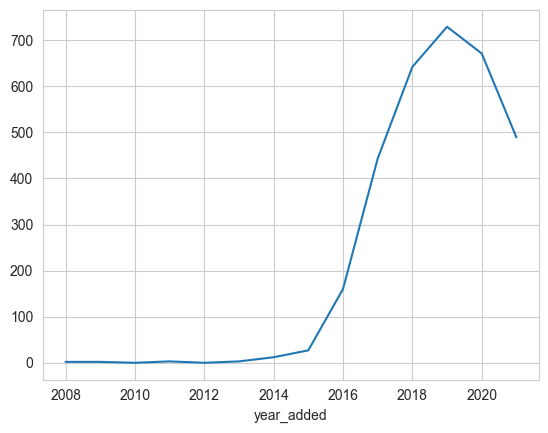

In [80]:
pd.crosstab(df['year_added'], df['rating'])['TV-MA'].plot()
plt.show()

In [81]:
df.groupby('type')['genre_count'].mean()

type
movie      2.151362
tv show    2.300233
Name: genre_count, dtype: float64

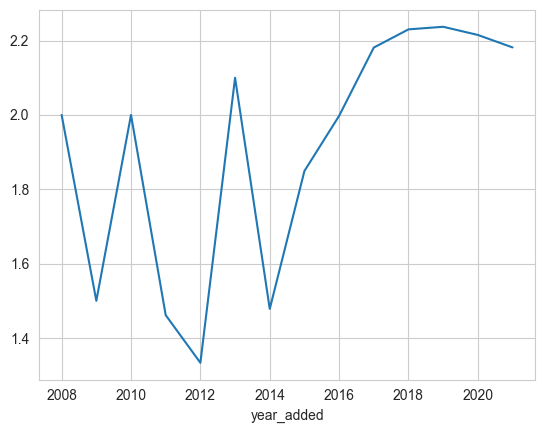

In [82]:
df.groupby('year_added')['genre_count'].mean().plot()
plt.show()

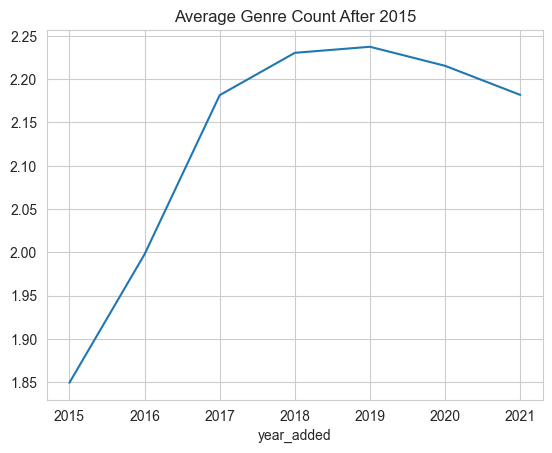

In [83]:
df[df['year_added'] >= 2015].groupby('year_added')['genre_count'].mean().plot()
plt.title("Average Genre Count After 2015")
plt.show()

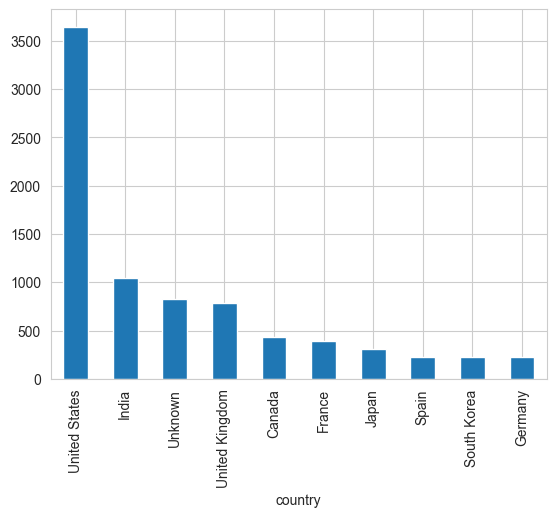

In [84]:
df_country = df.explode('country')
df_country['country'].value_counts().head(10).plot(kind='bar')
plt.show()

In [85]:
df['country'] = df['country'].str.split(', ')

In [86]:
df_country = df.explode('country').reset_index(drop=True)

In [87]:
pd.crosstab(df_country['country'], df_country['is_original']).head(10)

is_original
country


In [88]:
df.to_csv("../data/processed/netflix_feature_engineered.csv", index=False)